<a href="https://colab.research.google.com/github/ssamadjon3106/PyTorch-with-Deep-Learning/blob/main/04_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
!nvidia -smi

/bin/bash: line 1: nvidia: command not found


In [ ]:
# get data
import requests
import zipfile
from pathlib import Path
data_path=Path('data')
image_path=data_path/'pizza_steak_sushi'

if image_path.is_dir():
    print(f'{image_path} already exists')
else:
  print(f'{image_path} does not exist, creatig one...')
  image_path.mkdir(parents=True, exist_ok=True)

# download
with open('pizza_steak_sushi.zip', 'wb') as f:
  request=requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip')
  print('Downloading....')
  f.write(request.content)

#unzipping
with zipfile.ZipFile('pizza_steak_sushi.zip', 'r') as zip_file:
  print('Unzipping file...')
  zip_file.extractall(image_path)



data/pizza_steak_sushi does not exist, creatig one...
Downloading....
Unzipping file...


In [ ]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images and images in {dirpath}')

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images and images in data/pizza_steak_sushi
There are 3 directories and 0 images and images in data/pizza_steak_sushi/test
There are 0 directories and 25 images and images in data/pizza_steak_sushi/test/pizza
There are 0 directories and 19 images and images in data/pizza_steak_sushi/test/steak
There are 0 directories and 31 images and images in data/pizza_steak_sushi/test/sushi
There are 3 directories and 0 images and images in data/pizza_steak_sushi/train
There are 0 directories and 78 images and images in data/pizza_steak_sushi/train/pizza
There are 0 directories and 75 images and images in data/pizza_steak_sushi/train/steak
There are 0 directories and 72 images and images in data/pizza_steak_sushi/train/sushi


In [ ]:
train_dir=image_path/'train'
test_dir=image_path/'test'

In [ ]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

random image data/pizza_steak_sushi/test/pizza/2871261.jpg
image class pizza
Image weight 512
Image height 384


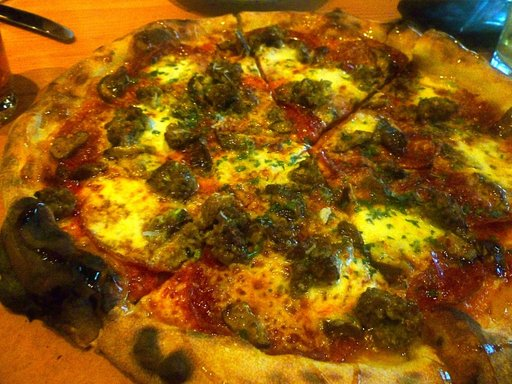

In [ ]:
import random
from PIL import Image

#
image_path_list=list(image_path.glob('*/*/*.jpg'))
random_image_path=random.choice(image_path_list)
print(f'random image {random_image_path}')

image_class=random_image_path.parent.stem
print(f'image class {image_class}')
img=Image.open(random_image_path)
print('Image weight', img.width)
print('Image height', img.height)


img



(np.float64(-0.5), np.float64(511.5), np.float64(383.5), np.float64(-0.5))

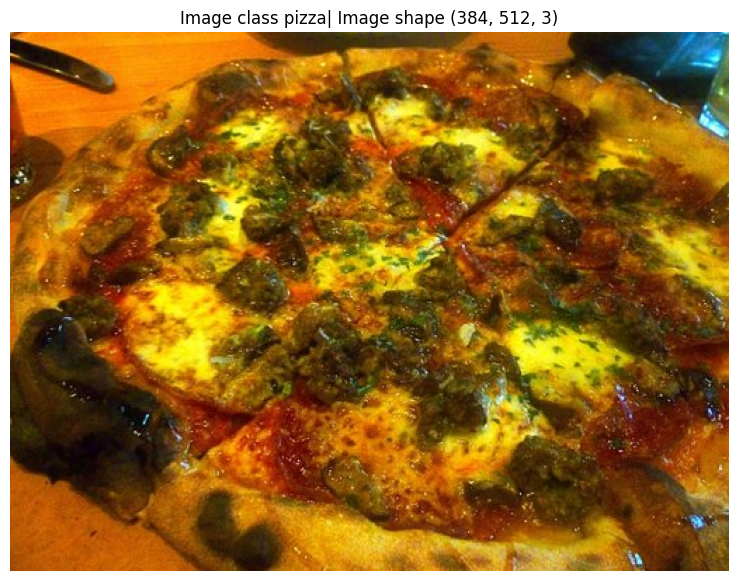

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

image_as_array=np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(image_as_array)
plt.title(f'Image class {image_class}| Image shape {image_as_array.shape}')
plt.axis(False)


array([[[214, 150,  63],
        [189, 123,  39],
        [162,  90,  14],
        ...,
        [162, 255, 255],
        [156, 254, 255],
        [123, 220, 226]],

       [[164,  98,  14],
        [154,  86,   3],
        [140,  67,   0],
        ...,
        [ 59, 158, 177],
        [ 69, 166, 175],
        [ 65, 160, 164]],

       [[136,  68,   0],
        [145,  74,   0],
        [149,  72,   0],
        ...,
        [  9, 102, 119],
        [ 20, 110, 119],
        [ 28, 117, 121]],

       ...,

       [[156,  75,  10],
        [153,  72,   7],
        [156,  73,   7],
        ...,
        [117,  88,  22],
        [115,  85,  15],
        [100,  70,   0]],

       [[152,  71,   6],
        [155,  74,   9],
        [159,  76,  10],
        ...,
        [111,  81,  17],
        [115,  86,  16],
        [107,  79,   6]],

       [[139,  58,   0],
        [152,  71,   6],
        [160,  77,  11],
        ...,
        [ 98,  68,   4],
        [108,  79,  11],
        [109,  81,   8]]], dtype=uint8)
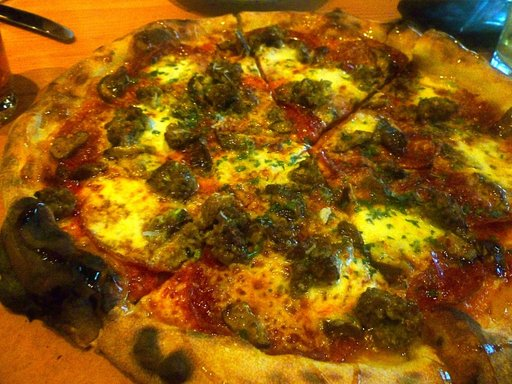

In [ ]:
image_as_array

In [ ]:
print(type(image_as_array))

<class 'numpy.ndarray'>


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
data_transform=transforms.Compose([
    #Resize image to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip image horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Convert numpy or PIl to Tensor
    transforms.ToTensor()
])

In [ ]:
data_transform(img)

tensor([[[0.6314, 0.9020, 0.9686,  ..., 0.1059, 0.1451, 0.1608],
         [0.1804, 0.3569, 0.6353,  ..., 0.1333, 0.1412, 0.1647],
         [0.2627, 0.1216, 0.1255,  ..., 0.1333, 0.1373, 0.2431],
         ...,
         [0.6824, 0.7020, 0.7216,  ..., 0.4353, 0.4510, 0.4941],
         [0.6627, 0.7020, 0.7373,  ..., 0.4275, 0.4235, 0.4392],
         [0.6510, 0.6941, 0.7216,  ..., 0.3843, 0.3961, 0.4196]],

        [[0.3412, 0.5059, 0.5176,  ..., 0.4588, 0.5176, 0.5255],
         [0.0941, 0.1961, 0.3608,  ..., 0.4980, 0.5294, 0.5059],
         [0.1686, 0.0706, 0.0667,  ..., 0.5451, 0.6745, 0.5961],
         ...,
         [0.3294, 0.3294, 0.3451,  ..., 0.2627, 0.3176, 0.3608],
         [0.3098, 0.3333, 0.3569,  ..., 0.2627, 0.2941, 0.3098],
         [0.3059, 0.3255, 0.3412,  ..., 0.2196, 0.2627, 0.2980]],

        [[0.0745, 0.0588, 0.0196,  ..., 0.6784, 0.7020, 0.6392],
         [0.0471, 0.0471, 0.0471,  ..., 0.7255, 0.7451, 0.5843],
         [0.0706, 0.0314, 0.0314,  ..., 0.7804, 0.9020, 0.

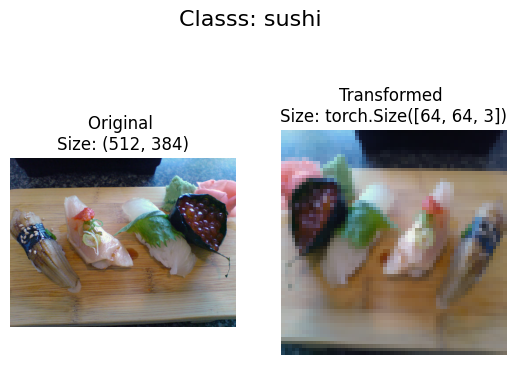

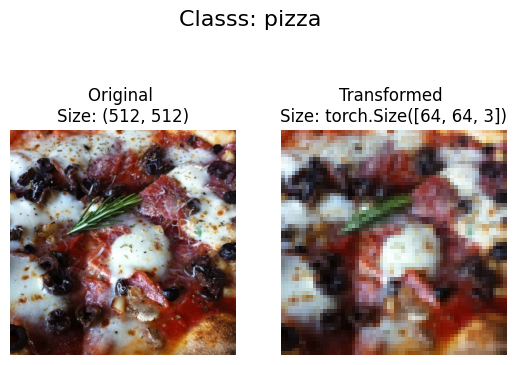

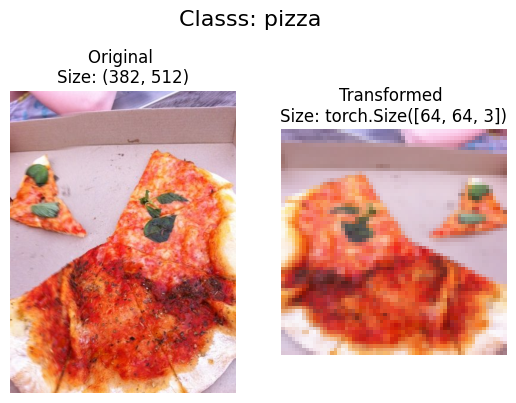

In [ ]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  if seed:
    random.seed(42)

  random_image_paths=random.sample(image_paths, k=n)

  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax=plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f'Original \nSize: {f.size}')
      ax[0].axis(False)
      transformed_image=transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'Transformed \nSize: {transformed_image.shape}')
      ax[1].axis(False)
      fig.suptitle(f'Classs: {image_path.parent.stem}', fontsize=(16))
plot_transformed_images(image_paths=image_path_list, transform=data_transform, n=3, seed=42)

In [ ]:
from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data=datasets.ImageFolder(root=test_dir, transform=data_transform)

In [ ]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [ ]:
class_names=train_data.classes

In [ ]:
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
len(train_data), len(test_data)

(225, 75)

In [ ]:
train_data

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [ ]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [ ]:
img, label=train_data[0][0], train_data[0][1]
img

tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0902, 0.0902, 0.

In [ ]:
class_names[label]

'pizza'

In [ ]:
img_permute=img.permute(1, 2, 0)

In [ ]:
img_permute.shape

torch.Size([64, 64, 3])

In [ ]:
img.shape

torch.Size([3, 64, 64])

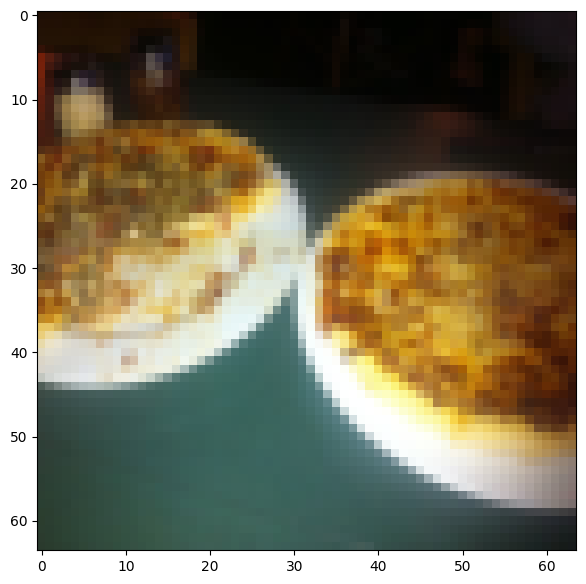

In [ ]:
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.imshow(img_permute)


In [ ]:
!nvidia-smi

Sat Jan 31 05:58:01 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
os.cpu_count()

2

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE=1
train_dataloader=DataLoader(dataset=train_data, batch_size=BATCH_SIZE, num_workers=1, shuffle=True)
test_dataloader=DataLoader(dataset=test_data, batch_size=BATCH_SIZE, num_workers=2, shuffle=False)

In [ ]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [ ]:
img, label=next(iter(train_dataloader))
print(f'Image shape: {img.shape}')
print(f'Label shape: {label.shape}')

Image shape: torch.Size([1, 3, 64, 64])
Label shape: torch.Size([1])


In [ ]:
import os
import torch
import pathlib
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

In [ ]:
target_directory=train_dir
class_names_found=sorted([entry.name for entry in os.scandir(image_path/'train')])
print(f'Class names found {class_names_found}')

Class names found ['pizza', 'steak', 'sushi']


In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  classes=sorted(entry.name for entry in os.scandir(directory) if directory.is_dir())

  if not classes:
    raise FileNotFoundError('Could not find any classes in directory')
  class_to_idx={class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [ ]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
from torch.utils.data import Dataset
class ImageFolderCostume(Dataset):
  def __init__(self, targ_dir: str, transform=None):
    super().__init__()
    self.paths=list(pathlib.Path(targ_dir).glob('*/*.jpg'))
    self.transform=transform
    self.classes, self.class_to_idx=find_classes(pathlib.Path(targ_dir))
  def load_images(self, index: int)-> Image.Image:
    image_path=self.paths[index]
    return Image.open(image_path)
  def __len__(self):
    return len(self.paths)
  def __getitem__(self, index) -> Tuple[torch.Tensor, int]:
    img=self.load_images(index)
    class_name=self.paths[index].parent.name
    class_idx=self.class_to_idx[class_name]
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx



In [ ]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [ ]:
train_data_custom=ImageFolderCostume(targ_dir=train_dir,
                                     transform=train_transforms)
test_data_custom=ImageFolderCostume(targ_dir=test_dir,
                                    transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCostume at 0x7e3a0c01d6a0>,
 <__main__.ImageFolderCostume at 0x7e3a0c01d760>)

In [ ]:
train_dir

PosixPath('data/pizza_steak_sushi/train')

In [ ]:
test_dir

PosixPath('data/pizza_steak_sushi/test')

In [ ]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


In [ ]:
model_0=ImageFolderCostume(targ_dir=train_dir)


In [ ]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes:List[str]=None,
                          n: int =10,
                          display_shape: bool=True,
                          seed: int=None):
  if n>10:
    n=10
    display_shape=False
  if seed:
    random.seed(seed)
  random_sample_idx=random.sample(range(len(dataset)), k=n)
  plt.figure(figsize=(16,8))

  for i , targ_sample in enumerate(random_sample_idx):
    targ_image, targ_label=dataset[targ_sample][0], dataset[targ_sample][1]

    targ_img_adjust=targ_image.permute(1,2, 0)

    plt.subplot(1, n, i+1)
    plt.imshow(targ_img_adjust)
    plt.axis(False)
    if classes:
      title=f'Class: {classes[targ_label]}'
      if display_shape:
        title=title + f' | Shape: {targ_img_adjust.shape}'
      plt.title(title)

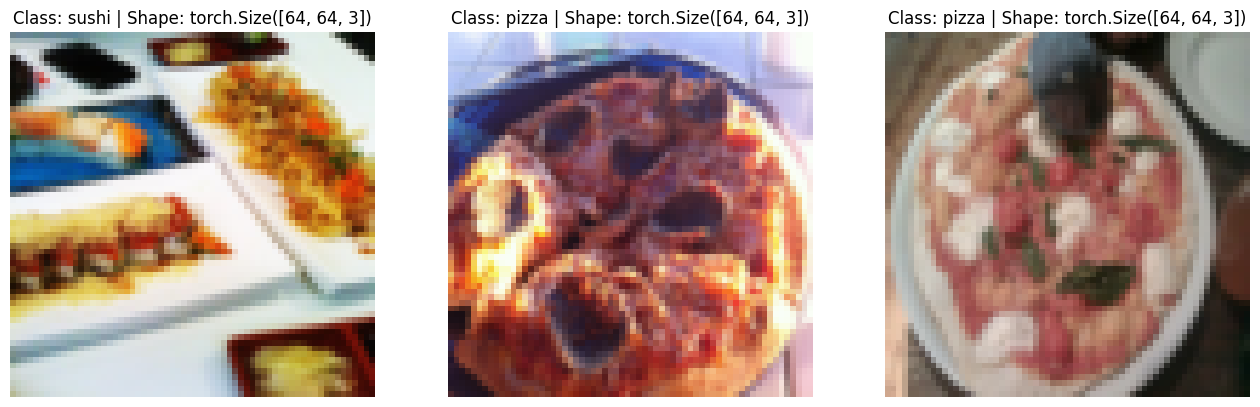

In [ ]:
display_random_images(train_data, n=3, classes=class_names, seed=42)

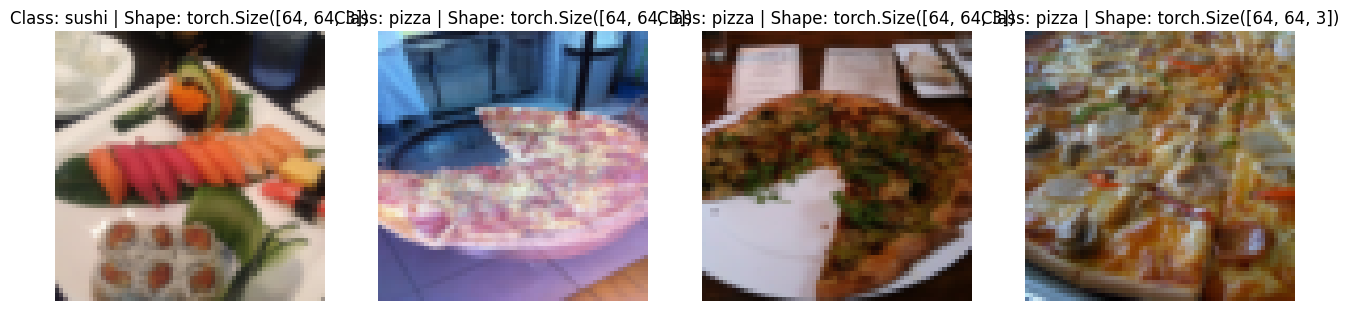

In [ ]:
display_random_images(train_data_custom,
                      n=4,
                      classes=class_names,
                      seed=None)

In [ ]:
from torch.utils.data import DataLoader
train_dataloader_custom=DataLoader(dataset=train_data_custom, batch_size=31, num_workers=0, shuffle=True)
test_dataloader_custom=DataLoader(dataset=test_data_custom, batch_size=31, num_workers=0, shuffle=False)


In [ ]:
from torchvision.transforms import v2

train_transforms=v2.Compose([
    v2.Resize((64, 64,)),
    v2.TrivialAugmentWide(),
    v2.ToDtype(torch.float32)
])
test_transforms=v2.Compose([
    v2.Resize((64, 64)),
    v2.ToDtype(torch.float32)
])



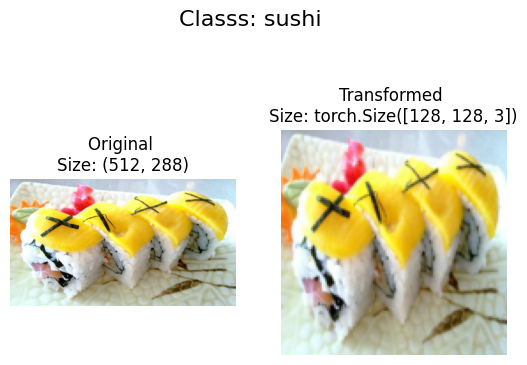

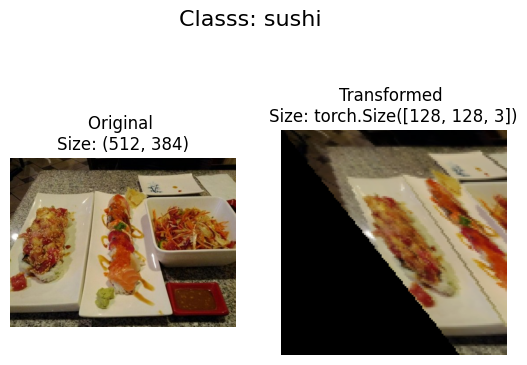

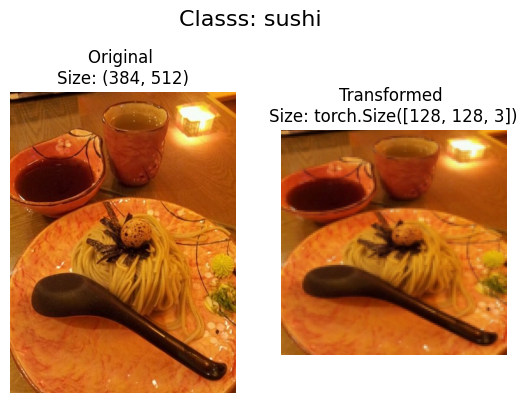

In [ ]:
from torchvision.transforms import v2
import torch

# Redefine train_transforms to include conversion to tensor
train_transforms_fixed = v2.Compose([
    v2.Resize((128, 128)),
    v2.TrivialAugmentWide(),
    v2.ToImage(), # Convert PIL Image to PyTorch Image Tensor
    v2.ToDtype(torch.float32, scale=True) # Ensure the dtype is float32 and scale to [0, 1]
])

plot_transformed_images(image_paths=image_path_list,
                        transform=train_transforms_fixed, # Use the fixed transform
                        n=3,
                        seed=None)

In [ ]:
simple_transform=transforms.Compose(
    [
        transforms.Resize((64, 64)),
        transforms.ToTensor()
    ]
)

In [ ]:
from torchvision import datasets
train_data_simple=datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple=datasets.ImageFolder(root=test_dir, transform=simple_transform)


In [ ]:
from torch.utils.data import DataLoader
import os
BATCH_SIZE=32
num_workers=os.cpu_count()
train_dataloader_simple=DataLoader(dataset=train_data_simple, batch_size=BATCH_SIZE, num_workers=num_workers, shuffle=True )
test_dataloader_simple=DataLoader(dataset=test_data_simple, batch_size=32, num_workers=num_workers, shuffle=False)


In [ ]:
os.cpu_count()

2

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
  def forward(self, x):
    x=self.conv_block_1(x)
    print(x.shape)
    x=self.conv_block_2(x)
    print(x.shape)
    x=self.classifier(x)
    print(self.x)
    return x


In [ ]:
torch.manual_seed(42)
model_0=TinyVGG(input_shape=3,# number of color channels in images
                hidden_units=10,
                output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=3, bias=True)
  )
)

In [ ]:
image_batch, label_batch=next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

import torch
from torch import nn

# Corrected TinyVGG class definition
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1, stride=1), # FIX: in_channels should be hidden_units
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1, stride=1), # FIX: in_channels should be hidden_units
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        # FIX: Calculate in_features correctly based on input_size=[1, 3, 64, 64]
        # After 2 MaxPool2d layers (each reduces by factor of 2),
        # spatial dimensions become 64 / (2*2) = 16x16.
        # So, in_features = hidden_units * 16 * 16
        nn.Linear(in_features=hidden_units * 16 * 16, out_features=output_shape)
        )
  def forward(self, x):
    x=self.conv_block_1(x)
    # print(x.shape) # Removed print statements for torchinfo compatibility
    x=self.conv_block_2(x)
    # print(x.shape) # Removed print statements for torchinfo compatibility
    x=self.classifier(x)
    # print(x) # FIX: Changed self.x to x and removed for torchinfo compatibility
    return x

from torchinfo import summary

# Re-instantiate model_0 with the corrected TinyVGG class
torch.manual_seed(42)
model_0=TinyVGG(input_shape=3,# number of color channels in images
                hidden_units=10,
                output_shape=len(class_names)).to(device)

# Now run the summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1362 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0846 | train_acc: 0.4258 | test_loss: 1.1622 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1153 | train_acc: 0.2930 | test_loss: 1.1695 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.2891 | test_loss: 1.1343 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0989 | train_acc: 0.2930 | test_loss: 1.1435 | test_acc: 0.1979
Total training time: 10.263 seconds


In [ ]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]] ):
  loss=results['train_loss']
  test_loss=results['test_loss']
  accuracy=results['train_acc']
  test_accuracy=results['test_acc']

  epochs=range(len(results['train_loss']))

  plt.figure(figsize=(15, 10))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label='train_loss')
  plt.plot(epochs, test_loss, label='test_loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label='train_accuracy')
  plt.plot(epochs, test_accuracy, label='test_accuracy')
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.legend()

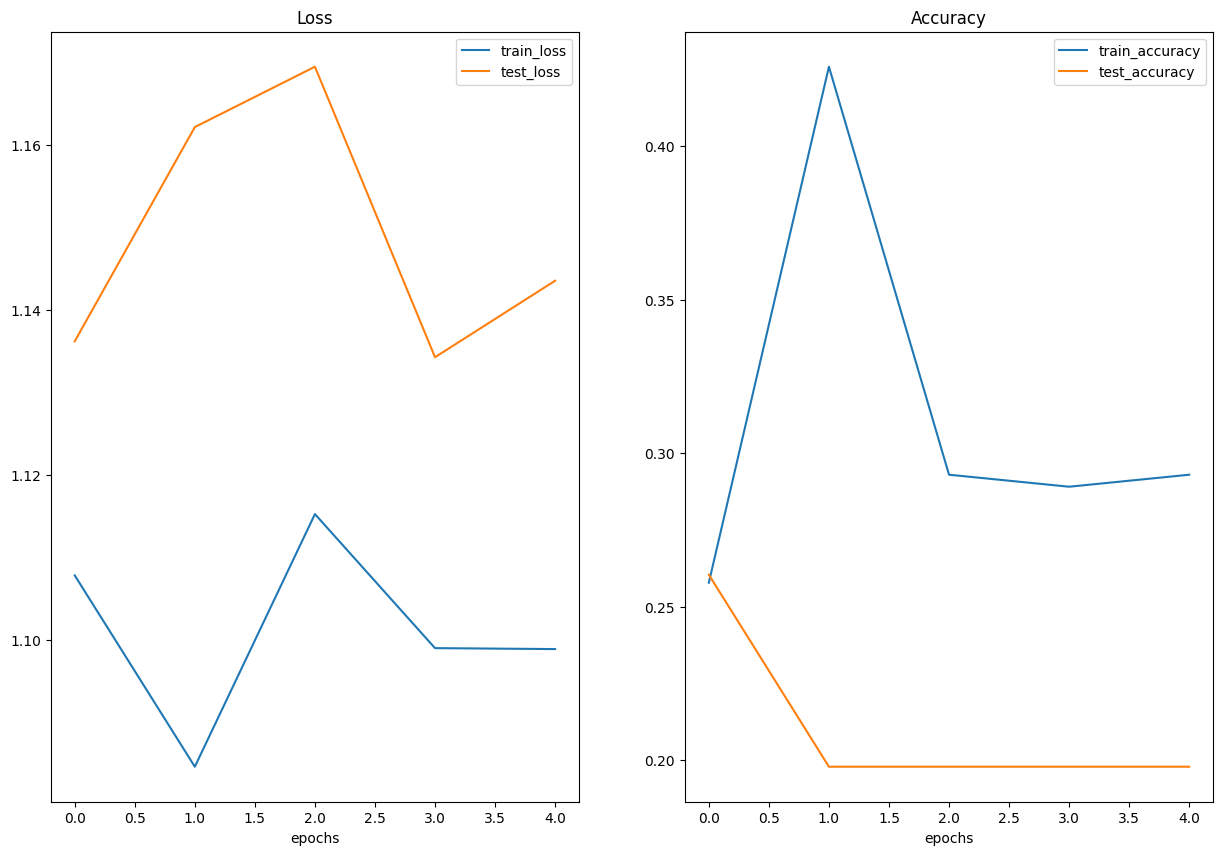

In [ ]:
plot_loss_curves(model_0_results)

In [ ]:
from torchvision.transforms import v2
train_transform_trivial_augment=v2.Compose(
    [
        v2.Resize((64, 64)),
        v2.TrivialAugmentWide(num_magnitude_bins=31),
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True) # Convert to float and scale to [0, 1]
    ]
)

test_transform=v2.Compose(
    [
        v2.Resize((64, 64)),
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True) # Convert to float and scale to [0, 1]
    ]
)

In [ ]:
train_data_augmented=datasets.ImageFolder(root=train_dir, transform=train_transform_trivial_augment)
test_data_simple=datasets.ImageFolder(test_dir, transform=test_transform)
train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                  Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=True)
                  TrivialAugmentWide(interpolation=InterpolationMode.NEAREST, num_magnitude_bins=31)
                  ToImage()
                  ToDtype(scale=True)
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                  Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=True)
                  ToImage()
                  ToDtype(scale=True)
            ))

In [ ]:
import os
num_workers=os.cpu_count()
torch.manual_seed(42)
train_dataloader_augmented=DataLoader(dataset=train_data_augmented, batch_size=32, num_workers=num_workers, shuffle=True)
test_dataloader_simple=DataLoader(dataset=test_data_simple, batch_size=32 , shuffle=False)
test_dataloader, train_dataloader_augmented

(<torch.utils.data.dataloader.DataLoader at 0x7e3a0c3b86e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e3a0c480f50>)

In [ ]:
torch.manual_seed(42)
model_1=TinyVGG(input_shape=3, hidden_units=10, output_shape=len(train_data_augmented))
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=225, bias=True)
  )
)

In [ ]:

loss_fn=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_1.parameters(), lr=0.001)


In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
torch.manual_seed(42)
epochs=5

from timeit import default_timer as timer
start_time=timer()

# Recreate an instance of TinyVGG with the correct output_shape
model_1=TinyVGG(input_shape=3,
                hidden_units=10,
                output_shape=len(class_names)).to(device) # Changed output_shape

# Setup loss function and optimizer
loss_fn=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_1.parameters(), lr=0.001)


# Train model_1 with the correct dataloader
model_1_results=train(model=model_1,
                      train_dataloader=train_dataloader_augmented, # Changed to train_dataloader_augmented
                      test_dataloader=test_dataloader_simple,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=epochs)
end_time=timer()
print(f'Total timing for model_1 {end_time-start_time:.5f} seconds')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1070 | train_acc: 0.2578 | test_loss: 1.1390 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0829 | train_acc: 0.4258 | test_loss: 1.1684 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1214 | train_acc: 0.2930 | test_loss: 1.1736 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0960 | train_acc: 0.4141 | test_loss: 1.1411 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0946 | train_acc: 0.2930 | test_loss: 1.1413 | test_acc: 0.1979
Total timing for model_1 10.97424 seconds


In [ ]:
model_1_results

{'train_loss': [1.1069776713848114,
  1.0828738808631897,
  1.1213783919811249,
  1.0959950983524323,
  1.0945764482021332],
 'train_acc': [0.2578125, 0.42578125, 0.29296875, 0.4140625, 0.29296875],
 'test_loss': [1.1389869848887126,
  1.168377121289571,
  1.173565944035848,
  1.1410752932230632,
  1.1412860949834187],
 'test_acc': [0.2604166666666667,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666]}

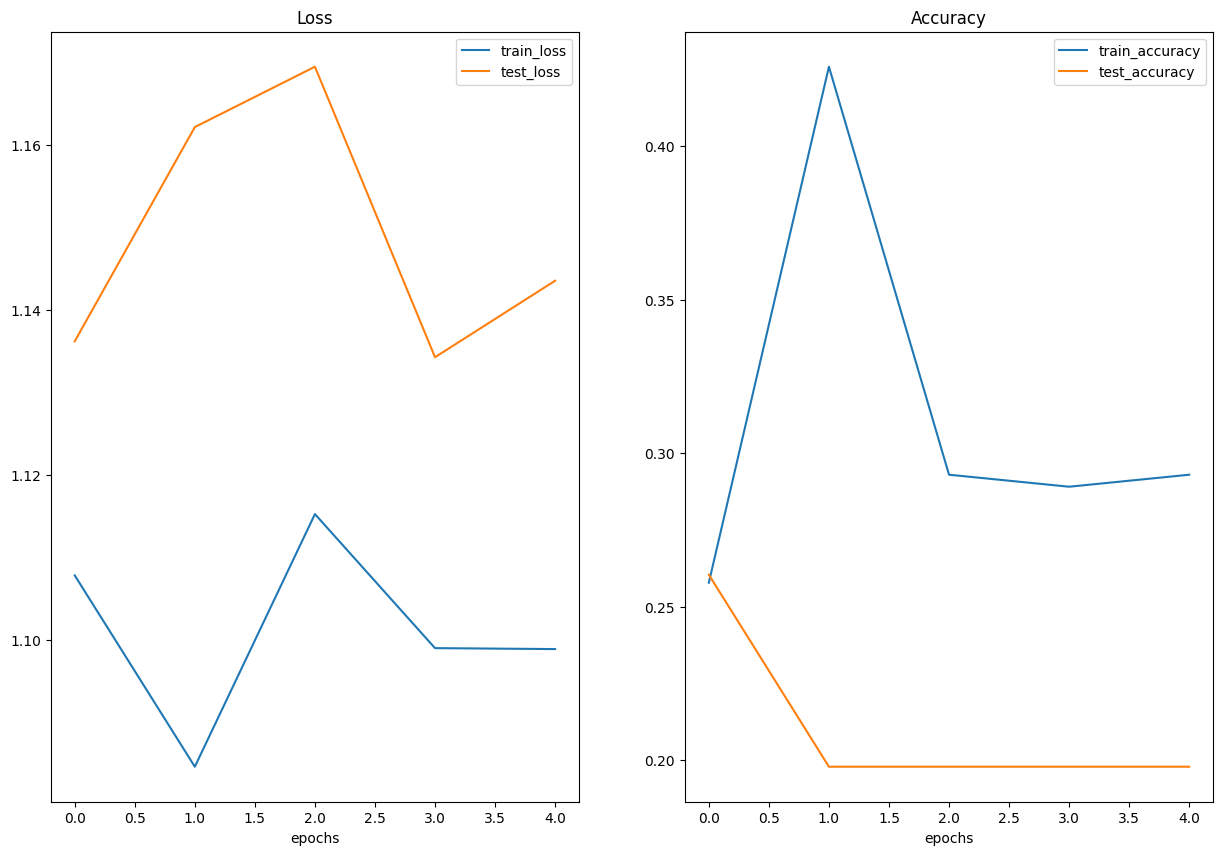

In [ ]:
plot_loss_curves(model_0_results)

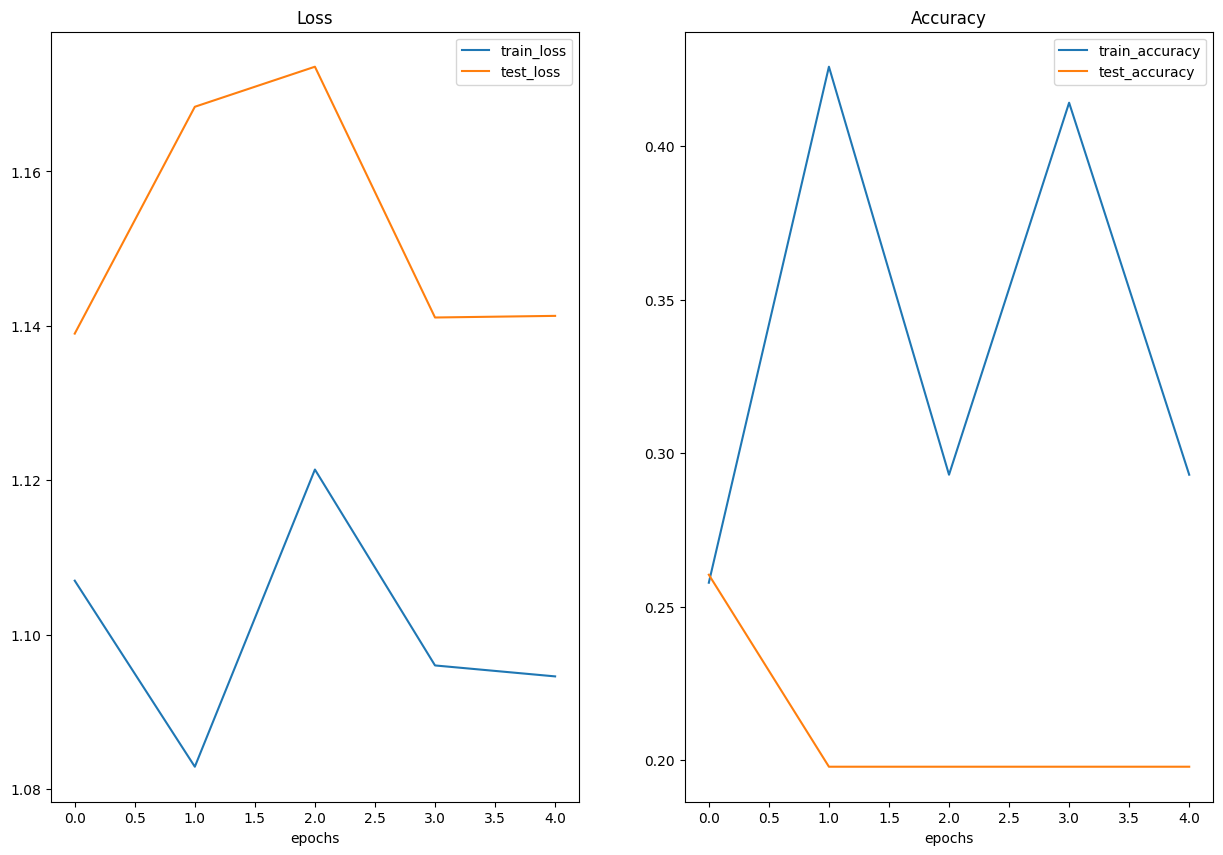

In [ ]:
plot_loss_curves(model_1_results)

In [ ]:
from torchinfo import summary
summary(model=model_1, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [ ]:
import pandas as pd
model_0_df=pd.DataFrame(model_0_results)
model_1_df=pd.DataFrame(model_1_results)
model_0_df


train_loss  train_acc  test_loss  test_acc
0    1.107836   0.257812   1.136208  0.260417
1    1.084646   0.425781   1.162172  0.197917
2    1.115267   0.292969   1.169488  0.197917
3    1.099020   0.289062   1.134277  0.197917
4    1.098904   0.292969   1.143549  0.197917

In [ ]:
model_1_df



train_loss  train_acc  test_loss  test_acc
0    1.106978   0.257812   1.138987  0.260417
1    1.082874   0.425781   1.168377  0.197917
2    1.121378   0.292969   1.173566  0.197917
3    1.095995   0.414062   1.141075  0.197917
4    1.094576   0.292969   1.141286  0.197917

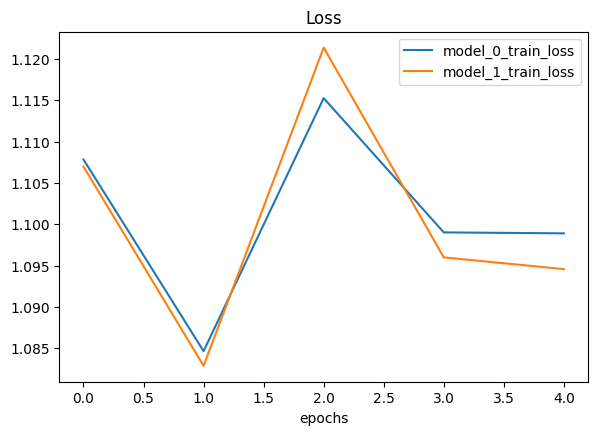

In [ ]:
plt.figure(figsize=(15, 10))
epochs=range(len(model_0_df))
#train losss
plt.subplot(2, 2,1 )
plt.plot(epochs, model_0_df['train_loss'], label='model_0_train_loss')
plt.plot(epochs, model_1_df['train_loss'], label='model_1_train_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.legend();

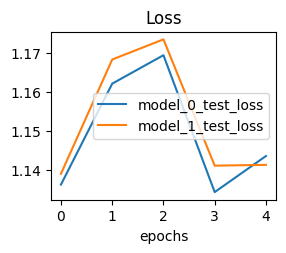

In [ ]:
plt.subplot(2, 2,2)
plt.plot(epochs, model_0_df['test_loss'], label='model_0_test_loss')
plt.plot(epochs, model_1_df['test_loss'], label='model_1_test_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.legend();

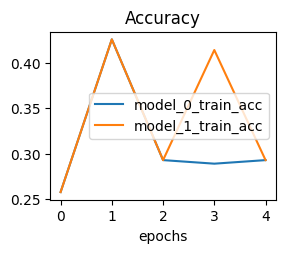

In [ ]:
plt.subplot(2, 2,2)
plt.plot(epochs, model_0_df['train_acc'], label='model_0_train_acc')
plt.plot(epochs, model_1_df['train_acc'], label='model_1_train_acc')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.legend();

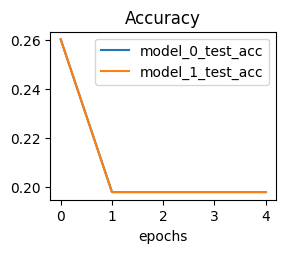

In [ ]:
plt.subplot(2, 2,1)
plt.plot(epochs, model_0_df['test_acc'], label='model_0_test_acc')
plt.plot(epochs, model_1_df['test_acc'], label='model_1_test_acc')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.legend();

In [ ]:
# Image Classification
import torch
from torchvision.transforms import v2

H, W = 32, 32
img = torch.randint(0, 226, size=(3, H, W), dtype=torch.uint8)

transforms = v2.Compose([
    v2.RandomResizedCrop(size=(224, 224), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img = transforms(img)


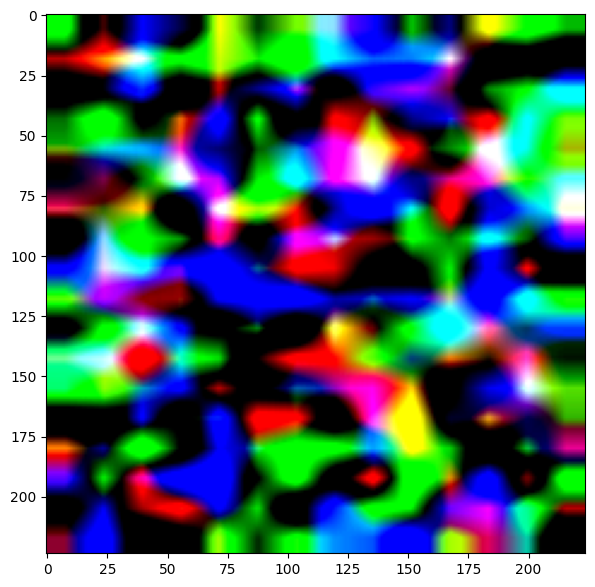

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))

In [ ]:
!nvidia-smi

Sat Jan 31 05:58:38 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P0             28W /   70W |     228MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.9.0+cu126


'cuda'

In [ ]:
# 1. Get data
import requests
from pathlib import Path
import zipfile

data_path=Path('data')
image_path=data_path/'pizza_steak_sushi'

if image_path.is_dir():
  print(f'{image_path} directory exists')
else:
  print(f'{image_path} directory does not exist, creating one...')
  image_path.mk_dir(parents=True, exist_ok=True)

  with open(data_path/'pizza_steak_sushi.zip', 'wb') as f:
    request=requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    f.write(request.content)

  with Zip.ZipFile(data_path/'pizza_steak_sushi.zip',  'r') as zip_ref:
    zip_ref.extractall(image_path)


data/pizza_steak_sushi directory exists


In [ ]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.


In [ ]:
# Setup train and testing paths
train_dir=image_path/'train'
test_dir=image_path/'test'
train_dir, test_dir


(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Image Path: data/pizza_steak_sushi/test/sushi/46797.jpg
Class name :sushi
Image height: 384
Image width: 512


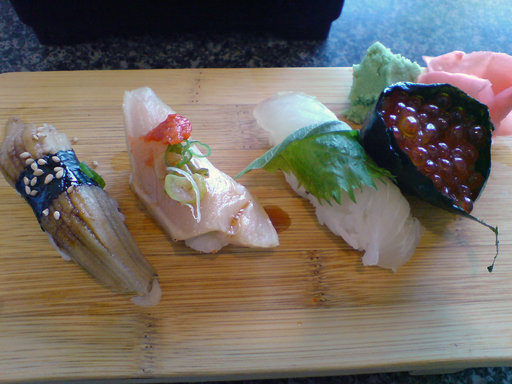

In [ ]:
# Visualize an image
from PIL import Image
import random

# Set seed
random.seed(42)
# 1. Get all image paths (* means "any combination")
image_path_list=list(image_path.glob("*/*/*.jpg"))
# 2. Get random image path
random_image_path=random.choice(image_path_list)
# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
class_name=random_image_path.parent.stem
# 4. Open image
img=Image.open(random_image_path)
# 5. Print metadata
print(f'Image Path: {random_image_path}')
print(f'Class name :{class_name}')
print(f'Image height: {img.height}')
print(f'Image width: {img.width}')
img


(np.float64(-0.5), np.float64(511.5), np.float64(383.5), np.float64(-0.5))

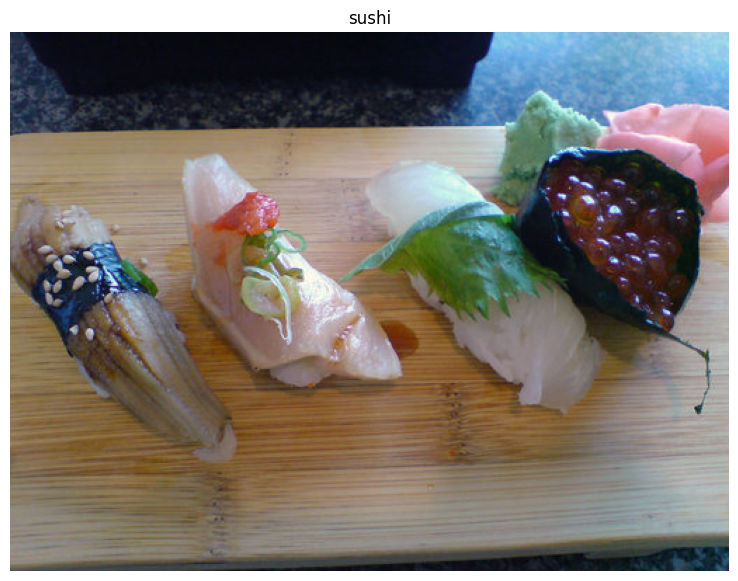

In [ ]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt
img_as_array=np.asarray(img)
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(class_name)
plt.axis(False)


In [ ]:
# Create simple transform
from torchvision import transforms
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

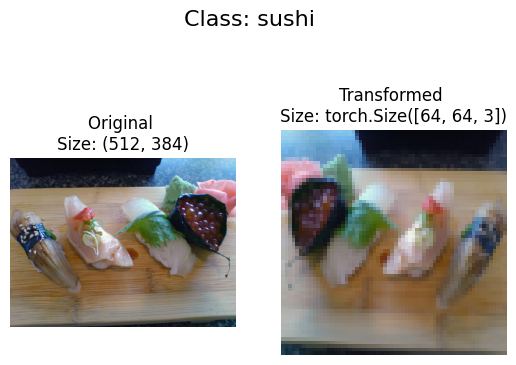

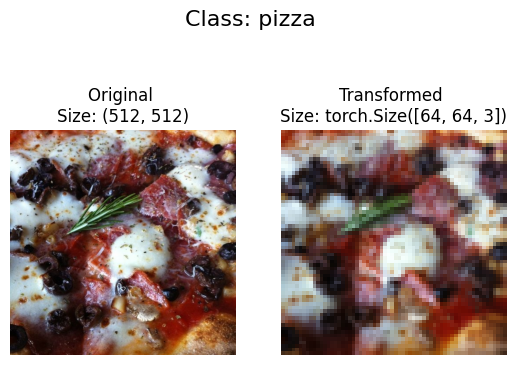

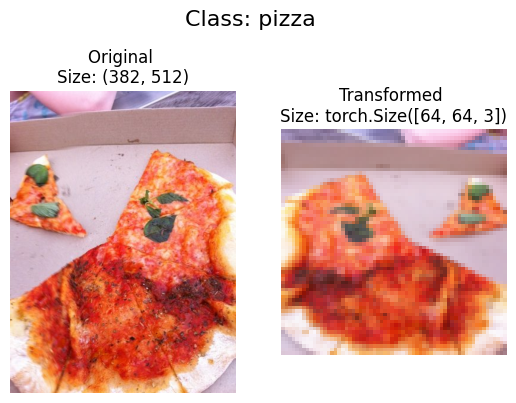

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

In [ ]:
 #Use ImageFolder to create dataset(s)
 from torchvision import datasets
 train_data=datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
 test_data=datasets.ImageFolder(root=test_dir, transform=data_transform)

 train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:

# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:

# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:

# Check the lengths of each dataset
len(train_data), len(test_data)


(225, 75)

In [ ]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
import os
num_workers=os.cpu_count()
train_dataloader=DataLoader(dataset=train_data,batch_size=32, num_workers=num_workers,shuffle=True )
test_dataloader=DataLoader(dataset=test_data, batch_size=32, num_workers=num_workers, shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e39aa4e20c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e3a0c2d6300>)

In [ ]:
class TinyVGGV2(nn.Module):
  def __init__(self, input_shape:int, hidden_units: int, output_shape:int):
    super().__init__()
    self.layer_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.layer_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.layer_block_3=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self, x):
    return self.classifier(self.layer_block_3(self.layer_block_2(self.layer_block_1(x))))

In [ ]:
model_2=TinyVGGV2(input_shape=3, hidden_units=20, output_shape=len(train_data.classes)).to(device)

In [ ]:
model_2

TinyVGGV2(
  (layer_block_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_block_3): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, pa

In [ ]:
print(model_2.parameters())

<generator object Module.parameters at 0x7e39aa530740>


In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 23.2 MB/s eta 0:00:00


In [ ]:

from torchmetrics import Accuracy
accuracy_fn=Accuracy(task='MULTICLASS', num_classes=len(class_names))
loss_fn=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_2.parameters(), lr=0.01)

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:

# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(),#TODO,
                             lr=0.001)

NUM_EPOCS=5
# Recreate an instance of TinyVGG
model_2 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0974 | train_acc: 0.2617 | test_loss: 1.1037 | test_acc: 0.2083
Epoch: 2 | train_loss: 1.0974 | train_acc: 0.3828 | test_loss: 1.1037 | test_acc: 0.2083
Epoch: 3 | train_loss: 1.0976 | train_acc: 0.3828 | test_loss: 1.1037 | test_acc: 0.2083
Epoch: 4 | train_loss: 1.0974 | train_acc: 0.3828 | test_loss: 1.1037 | test_acc: 0.2083
Epoch: 5 | train_loss: 1.0972 | train_acc: 0.3828 | test_loss: 1.1037 | test_acc: 0.2083
Total training time: 7.036 seconds


In [ ]:

# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(),#TODO,
                             lr=0.001)

NUM_EPOCS=20
# Recreate an instance of TinyVGG
model_2 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0974 | train_acc: 0.2617 | test_loss: 1.1037 | test_acc: 0.2083
Epoch: 2 | train_loss: 1.0974 | train_acc: 0.3828 | test_loss: 1.1037 | test_acc: 0.2083
Epoch: 3 | train_loss: 1.0976 | train_acc: 0.3828 | test_loss: 1.1037 | test_acc: 0.2083
Epoch: 4 | train_loss: 1.0974 | train_acc: 0.3828 | test_loss: 1.1037 | test_acc: 0.2083
Epoch: 5 | train_loss: 1.0972 | train_acc: 0.3828 | test_loss: 1.1037 | test_acc: 0.2083
Total training time: 12.191 seconds


In [ ]:

# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(),#TODO,
                             lr=0.001)

NUM_EPOCS=50
# Recreate an instance of TinyVGG
model_2 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0974 | train_acc: 0.2617 | test_loss: 1.1037 | test_acc: 0.2083
Epoch: 2 | train_loss: 1.0974 | train_acc: 0.3828 | test_loss: 1.1037 | test_acc: 0.2083
Epoch: 3 | train_loss: 1.0976 | train_acc: 0.3828 | test_loss: 1.1037 | test_acc: 0.2083
Epoch: 4 | train_loss: 1.0974 | train_acc: 0.3828 | test_loss: 1.1037 | test_acc: 0.2083
Epoch: 5 | train_loss: 1.0972 | train_acc: 0.3828 | test_loss: 1.1037 | test_acc: 0.2083
Total training time: 10.931 seconds


In [ ]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)


Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [ ]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.


In [ ]:
#Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [ ]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import os
num_workers=os.cpu_count()

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create datasets
train_data_20=ImageFolder(root=train_data_20_percent_path, transform=data_transform, target_transform=None)
test_data_20=ImageFolder(root=test_data_20_percent_path, transform=data_transform)


# Create dataloaders
train_dataloader_20=DataLoader(dataset=train_data_20, batch_size=32, shuffle=True, num_workers=num_workers)
test_dataloader_20=DataLoader(dataset=test_data_20, batch_size=32, shuffle=False, num_workers=num_workers)


In [ ]:

# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(),#TODO,
                             lr=0.001)

NUM_EPOCHS=20
# Recreate an instance of TinyVGG
model_2 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader_20,
                        test_dataloader=test_dataloader_20,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0983 | train_acc: 0.3500 | test_loss: 1.0993 | test_acc: 0.2938
Epoch: 2 | train_loss: 1.0991 | train_acc: 0.3000 | test_loss: 1.0994 | test_acc: 0.2687
Epoch: 3 | train_loss: 1.0983 | train_acc: 0.3292 | test_loss: 1.0992 | test_acc: 0.3000
Epoch: 4 | train_loss: 1.0989 | train_acc: 0.2687 | test_loss: 1.0992 | test_acc: 0.3187
Epoch: 5 | train_loss: 1.0992 | train_acc: 0.2667 | test_loss: 1.0992 | test_acc: 0.3000
Epoch: 6 | train_loss: 1.0983 | train_acc: 0.2979 | test_loss: 1.0993 | test_acc: 0.2875
Epoch: 7 | train_loss: 1.0982 | train_acc: 0.3146 | test_loss: 1.0993 | test_acc: 0.2938
Epoch: 8 | train_loss: 1.0982 | train_acc: 0.3479 | test_loss: 1.0992 | test_acc: 0.3063
Epoch: 9 | train_loss: 1.0982 | train_acc: 0.3125 | test_loss: 1.0991 | test_acc: 0.3000
Epoch: 10 | train_loss: 1.0991 | train_acc: 0.3167 | test_loss: 1.0992 | test_acc: 0.2875
Epoch: 11 | train_loss: 1.0990 | train_acc: 0.3021 | test_loss: 1.0992 | test_acc: 0.2812
Epoch: 12 | train_l

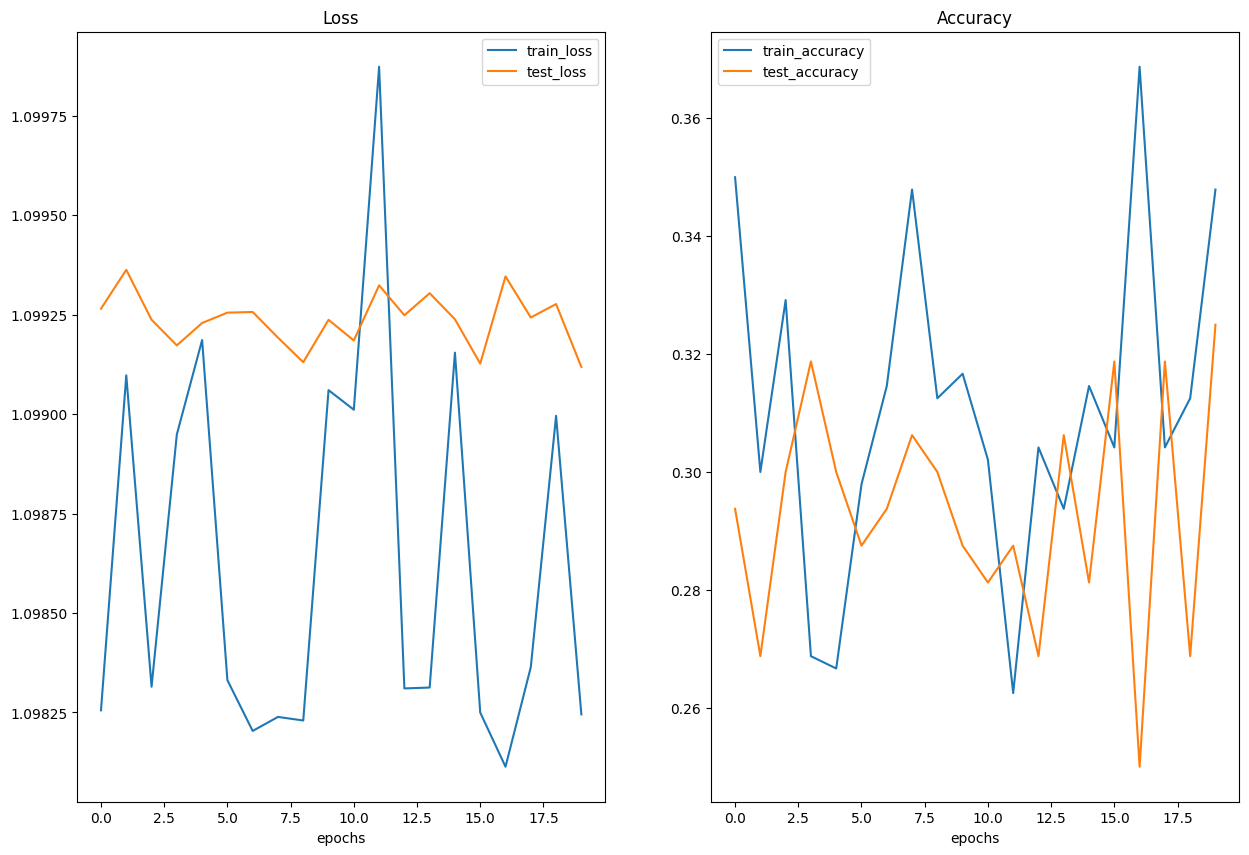

In [ ]:
plot_loss_curves(model_2_results)

In [ ]:
import requests
